In [56]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

import time

import algorithms as alg

#### Дополнительные методы для исследования функций:

In [57]:
def plot_complexity(n, times, complexity):

    times = np.array(times)

    times = lowess(times, n, frac=0.1, return_sorted=False)

    if complexity == 'O(1)':
        times2 = times.copy()
    elif complexity == 'O(n)':
        times2 = times / n
    elif complexity == 'O(n^2)':
        times2 = times / n**2
    elif complexity == 'O(n^3)':
        times2 = times / n**3
    elif complexity == 'O(logn)':
        times2 = times / np.log(n)
    elif complexity == 'O(nlogn)':
        times2 = times / (n * np.log(n))
    elif complexity == 'O(2^n)':
        times2 = times / 2**n

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Complexity: {complexity}')
    
    axs[0].plot(n, times)
    axs[0].set_xlabel('n')
    axs[0].set_ylabel('time')
    axs[0].grid()

    axs[1].plot(n, times2)
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('time / complexity')
    axs[1].grid()
    
    plt.subplots_adjust(wspace=0.5, hspace=0.6)
    plt.show()

In [58]:
def show_time(f):
    def temp_function(runs_count, complexity=None, gen_func_args=None):
        '''
        :param runs_count: количество запусков функции
        :param complexity: сложность алгоритма
        :param gen_func_args: функция генерации аргументов для функции f (должна принимать на вход размер списка)
        '''

        times = []
        for i in range(2, runs_count):
            params = gen_func_args(i)
            
            start = time.time()
            f(*params)
            end = time.time()
            times.append(end - start)

        plot_complexity(np.arange(2, runs_count), times, complexity)
        
    return temp_function

#### Исследование методов односвязного списка:

##### 1) append_item (вставка элемента в конец)
Операция всегда выполняется за O(1), поэтому у нее нет лучшего и худшего случаев
Исследуем только средний случай

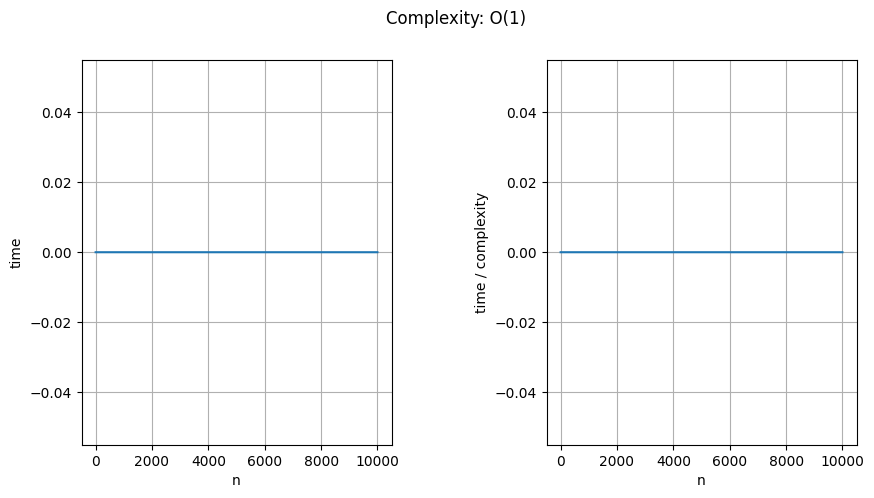

In [59]:
@show_time
def append(list: alg.LinkedList, value):
    list.insert_in_tail(value)

def gen_func_args_append(n):
    return alg.LinkedList(*np.random.randint(0, 1, n)), 0

append(runs_count=10000, complexity='O(1)', gen_func_args=gen_func_args_append)

##### 2) find (поиск элемента в списке)
Операция в среднем выполняется за O(n)
Худший случай: искомый элемент находится в конце списка (или его нет в списке): O(n)
Лучший случай: искомый элемент находится в начале списка: O(1)

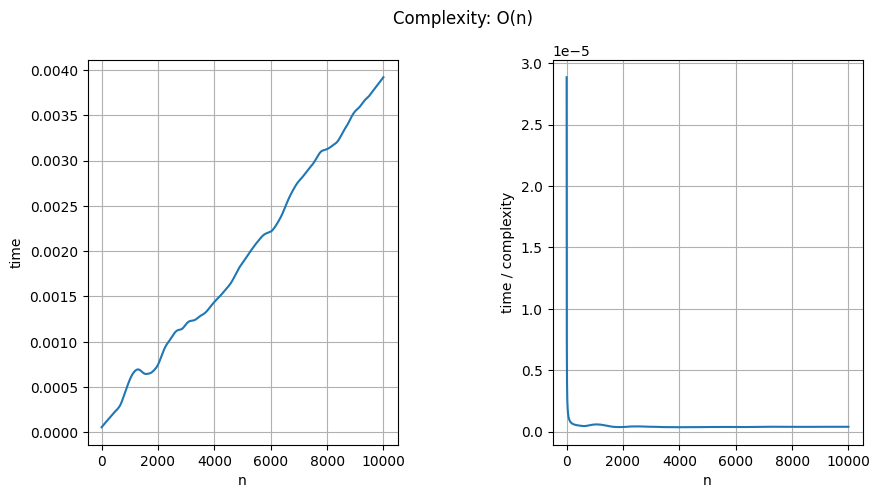

In [60]:
@show_time
def find(list: alg.LinkedList, value):
    return list.find_value(value)


def gen_params_find_worst(n):
    l = alg.LinkedList(*np.random.randint(0, 5, n))
    l.insert_in_tail(6)
    return l, 6

find(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_find_worst)

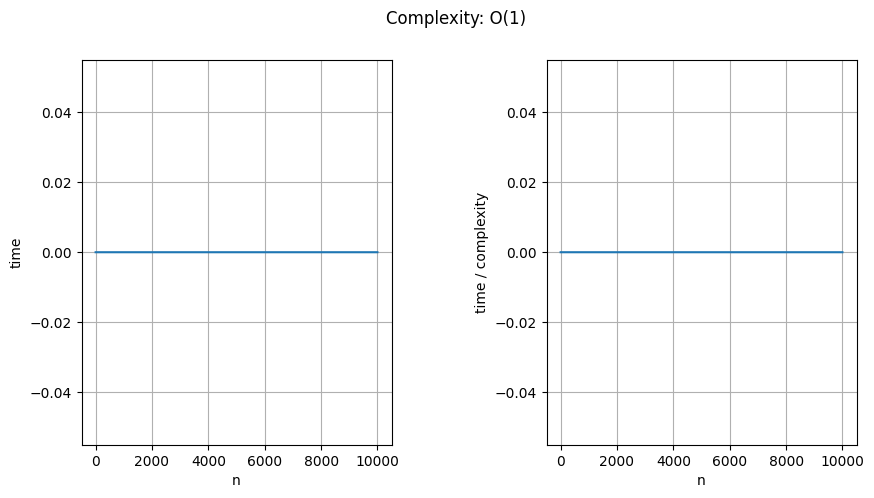

In [61]:
def gen_params_find_best(n):
    l = alg.LinkedList(*np.random.randint(0, 5, n))
    l.prepend_value(6)
    return l, 6

find(runs_count=10000, complexity='O(1)',  gen_func_args=gen_params_find_best)

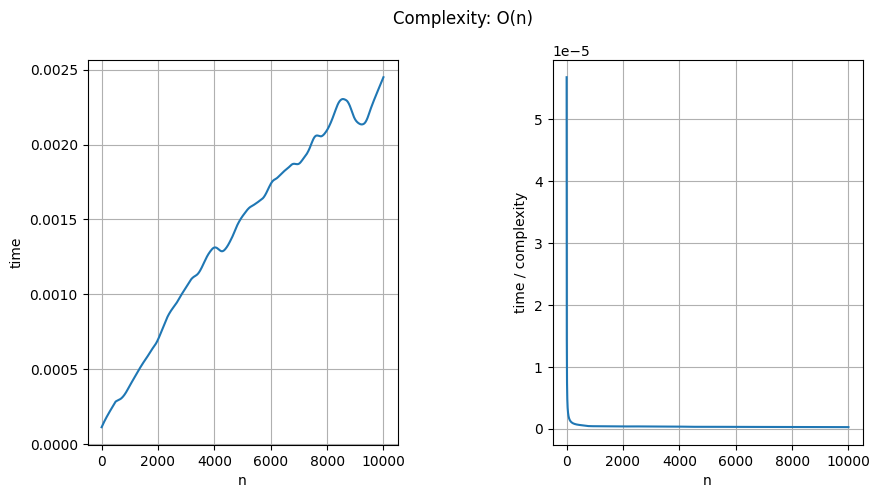

In [62]:
def gen_params_find_avg(n):
    return alg.LinkedList(*np.random.randint(0, 10000, n)), np.random.randint(0, 10000)

find(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_find_avg)

##### 3) insert (вставка элемента по индексу)
Операция в среднем выполняется за O(n)
Худший случай: вставка происходит в предпоследний индекс списка: O(n)
Лучшие случаи: вставка происходит в начало или конец списка: O(1)
Операции вставки в начало и конец списка выполняются за O(1)

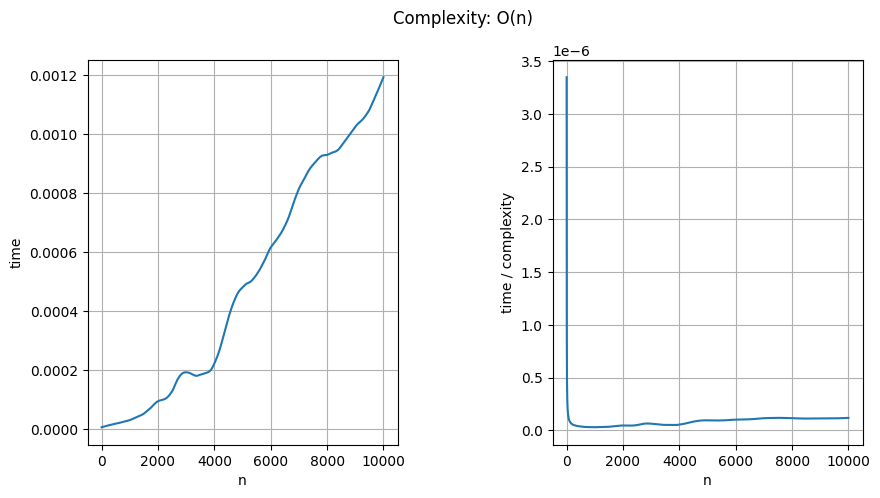

In [63]:
@show_time
def insert(list: alg.LinkedList, index, value):
    return list.insert(index, value)


def gen_params_insert_worst(n):
    return alg.LinkedList(*np.random.randint(0, 10000, n)), n - 2, np.random.randint(0, 10000)

insert(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_insert_worst)

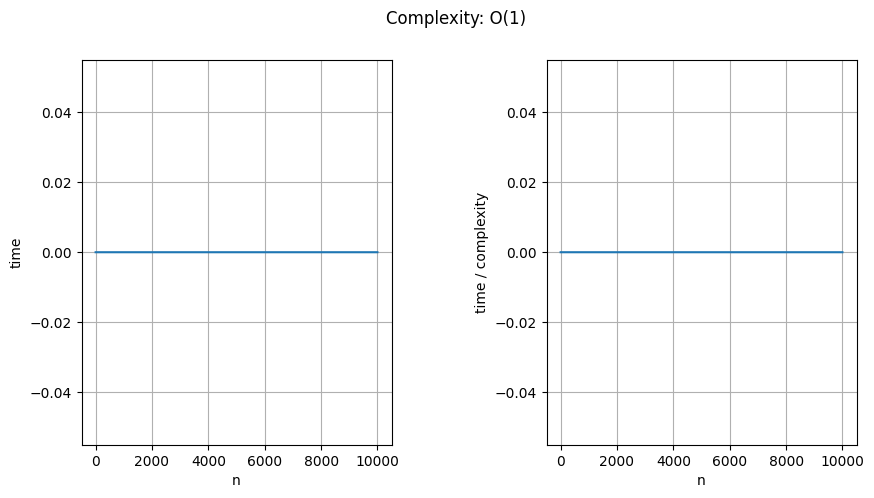

In [65]:
def gen_params_insert_best1(n):
    return alg.LinkedList(*np.random.randint(0, 10000, n)), 0, np.random.randint(0, 10000)

insert(runs_count=10000, complexity='O(1)', gen_func_args=gen_params_insert_best1)

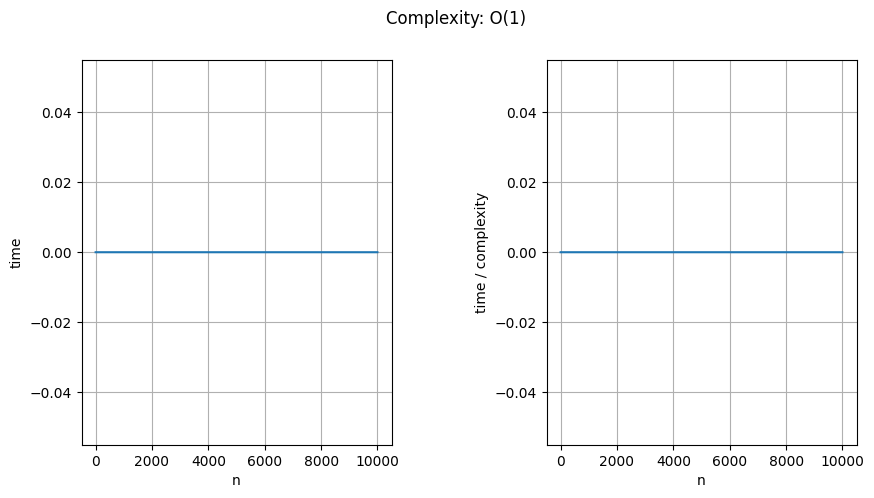

In [66]:
def gen_params_insert_best2(n):
    return alg.LinkedList(*np.random.randint(0, 10000, n)), n - 1, np.random.randint(0, 10000)

insert(runs_count=10000, complexity="O(1)", gen_func_args=gen_params_insert_best2)

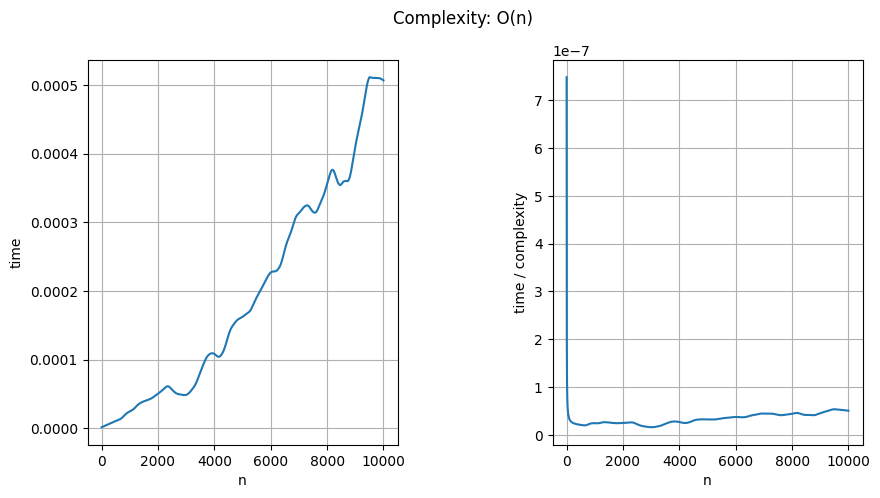

In [67]:
def gen_params_insert_avg(n):
    return alg.LinkedList(*np.random.randint(0, 2000, n)), np.random.randint(1, n), np.random.randint(0, 2000)

insert(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_insert_avg)

##### 4) remove (удаление элемента из списка по индексу)
Операция в среднем выполняется за O(n)
Худший случай: удаление последнего элемента: O(n)
Лучший случай: удаление первого элемента: O(1)

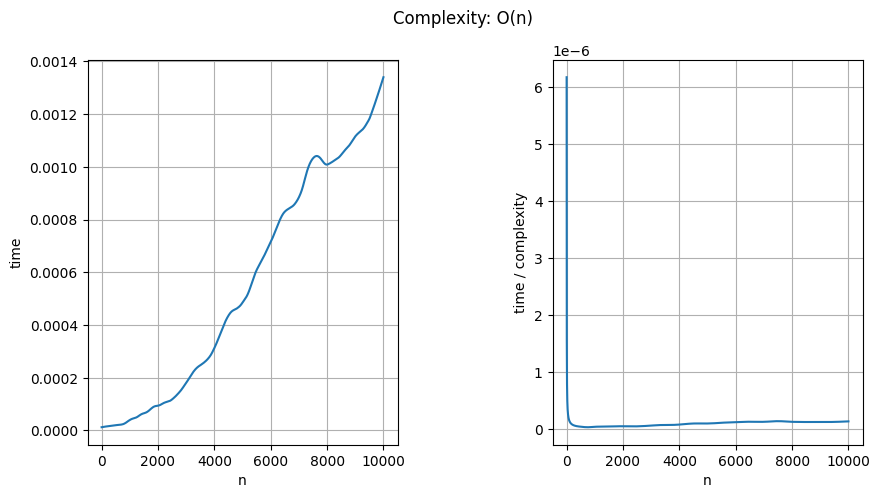

In [68]:
@show_time
def delete(list: alg.LinkedList, index):
    return list.remove(index)

def gen_params_delete_worst(n):
    return alg.LinkedList(*np.random.randint(0, 2000, n)), n-1

delete(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_delete_worst)

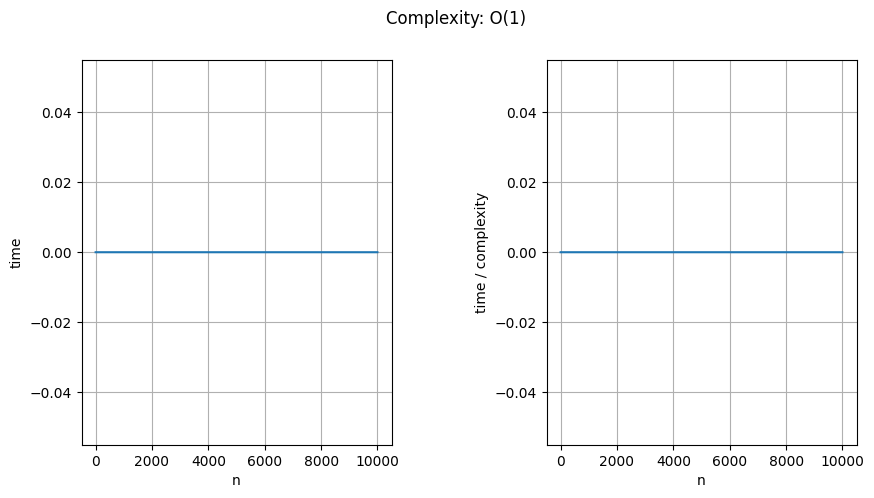

In [69]:
def gen_params_delete_best(n):
    return alg.LinkedList(*np.random.randint(0, 2000, n)), 0

delete(runs_count=10000, complexity='O(1)', gen_func_args=gen_params_delete_best)

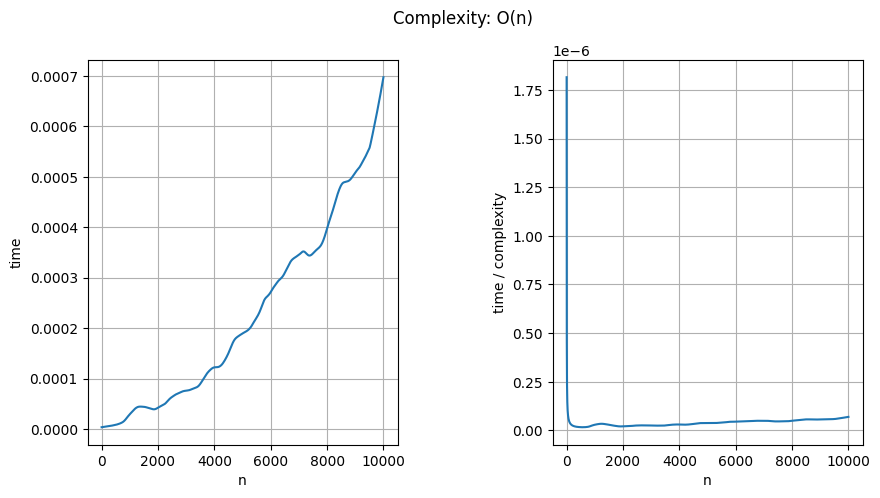

In [70]:
def gen_params_delete_avg(n):
    return alg.LinkedList(*np.random.randint(0, 2000, n)), np.random.randint(0, n-1)

delete(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_delete_avg)

##### 5) reverse (разворот списка)
Операция всегда выполняется за O(n)

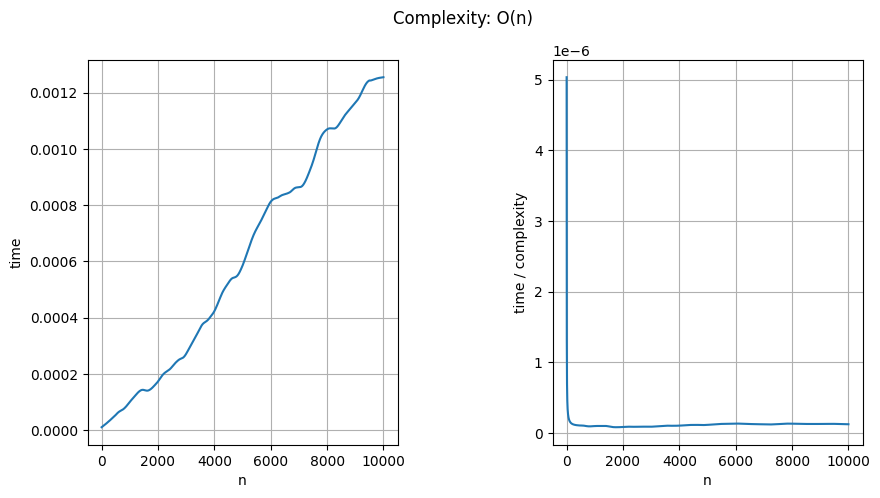

In [71]:
@show_time
def reverse(list: alg.LinkedList):
    return list.reverse()

def gen_params_reverse(n):
    return [alg.LinkedList(*np.random.randint(0, 2000, n))]

reverse(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_reverse)

##### 6) split (разделение списка на 2 равные части)
Операция всегда выполняется за O(n)

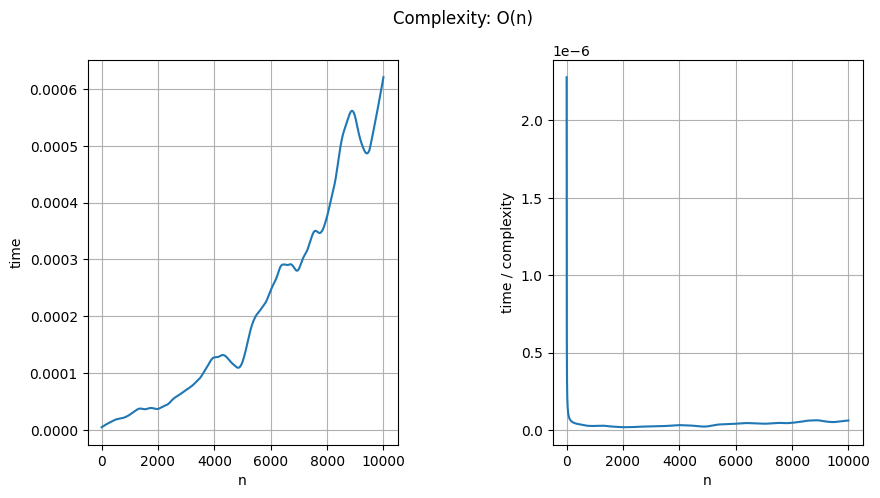

In [72]:
@show_time
def split(list: alg.LinkedList):
    return list.split()

def gen_params_split(n):
    return [alg.LinkedList(*np.random.randint(0, 2000, n))]

split(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_split)

##### 7) merge (слияние отсортированных списков)
Операция всегда выполняется за O(n+m), где n и m - размеры списков
Если n = m, то O(n+m) = O(n)

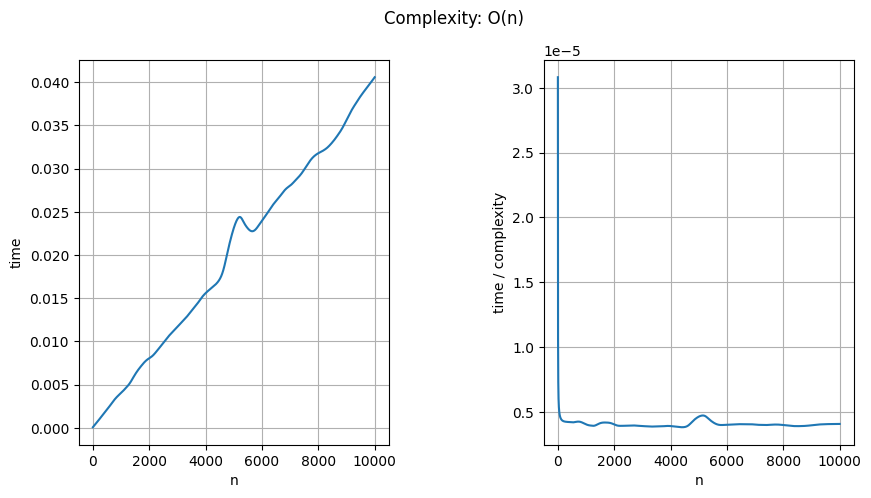

In [73]:
@show_time
def merge(list1: alg.LinkedList, list2: alg.LinkedList):
    return alg.LinkedList.merge_sorted_lists(list1, list2)

def gen_params_merge(n):
    l1 = np.random.randint(0, 2000, n)
    l1.sort()

    l2 = np.random.randint(0, 2000, n)
    l2.sort()

    return l1, l2

merge(runs_count=10000, complexity='O(n)', gen_func_args=gen_params_merge)

#### Исследование методов бинарного дерева поиска:

##### 1) Построение дерева поиска
Алгоритм всегда выполняется за O(n)

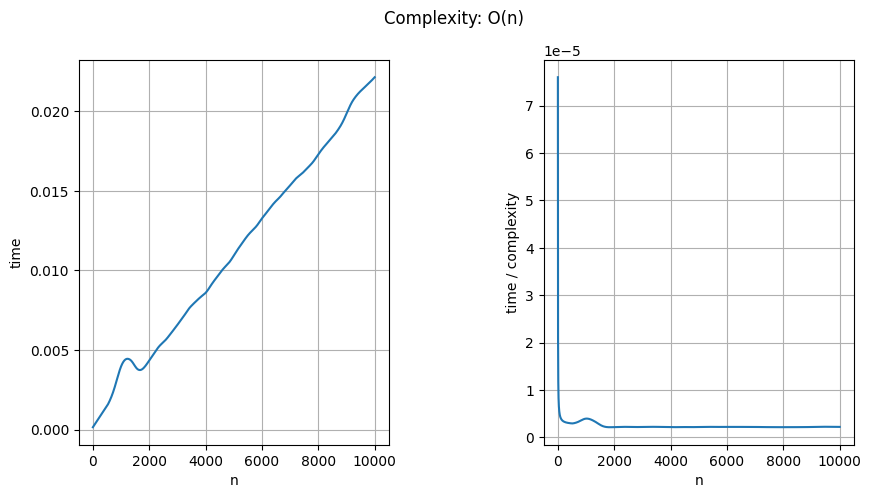

In [74]:
@show_time
def sorted_list_to_bst(list):
    return alg.BinaryTree.sorted_list_to_bst(list)

def gen_params_sorted_list_to_bst(n):
    l = np.random.randint(0, n, n)
    l.sort()
    return [l]

sorted_list_to_bst(runs_count=10000, complexity="O(n)", gen_func_args=gen_params_sorted_list_to_bst)

##### 2) Поиск в дереве поиска
Алгоритм в среднем выполняется за O(logn) в случае сбалансированного дерева
Лучший случай: элемент находится в корне дерева: O(1)
Худший случай: элемента нет в дереве или элемент находится в листе: O(logn)

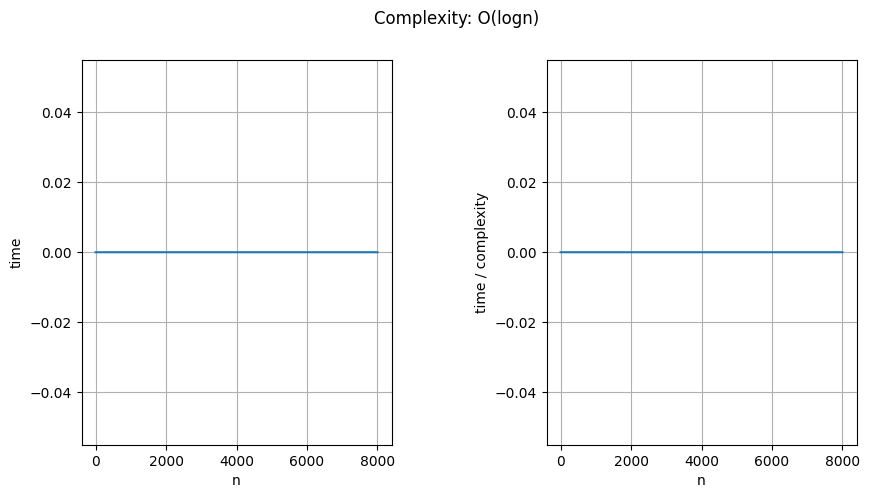

In [75]:
@show_time
def find_in_bst(tree: alg.BinaryTree, value):
    return tree.find_in_bst(value)

def gen_params_find_in_bst_worst(n):
    l = np.array([i for i in range(n)])
    bst = alg.BinaryTree(alg.BinaryTree.sorted_list_to_bst(l))
    return bst, 0

find_in_bst(runs_count=8000, complexity="O(logn)", gen_func_args=gen_params_find_in_bst_worst)

##### Так как logn достаточно мал, то runs_count=8000 недостаточно, чтобы увидеть зависимость. Но с большим количеством итераций подсчет будет длиться очень долго, поэтому оставляем runs_count=8000.

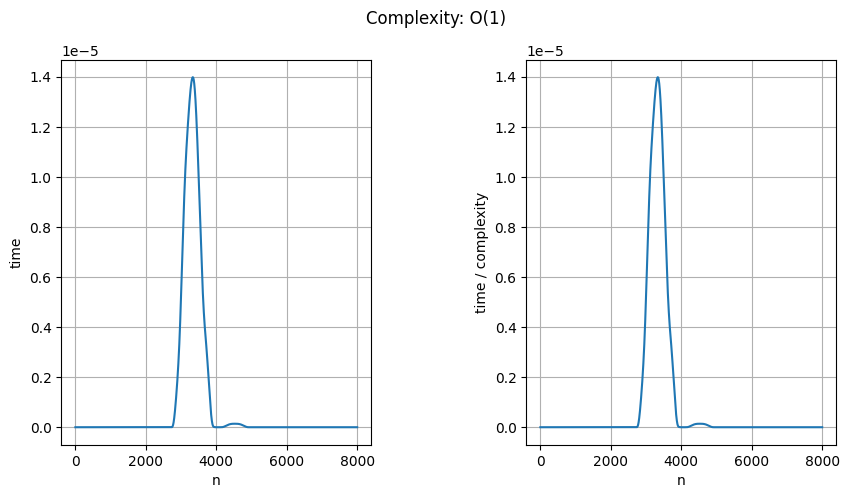

In [76]:
def gen_params_find_in_bst_best(n):
    l = np.array([i for i in range(n)])
    bst = alg.BinaryTree(alg.BinaryTree.sorted_list_to_bst(l))
    return bst, n // 2

find_in_bst(runs_count=8000, complexity="O(1)", gen_func_args=gen_params_find_in_bst_best)

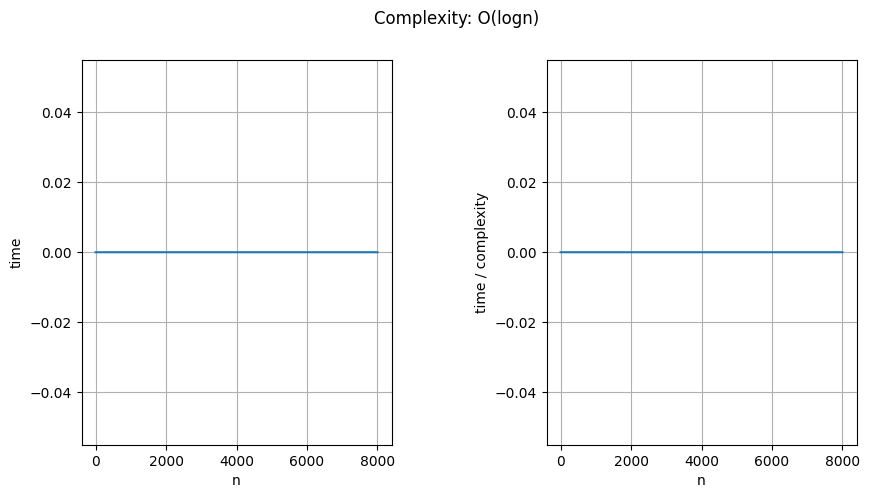

In [77]:
def gen_params_find_in_bst_avg(n):
    l = np.array([i for i in range(n)])
    bst = alg.BinaryTree(alg.BinaryTree.sorted_list_to_bst(l))
    return bst, np.random.randint(0, n)

find_in_bst(runs_count=8000, complexity="O(logn)", gen_func_args=gen_params_find_in_bst_avg)

#### Исследование алгоритма подсчета воды:

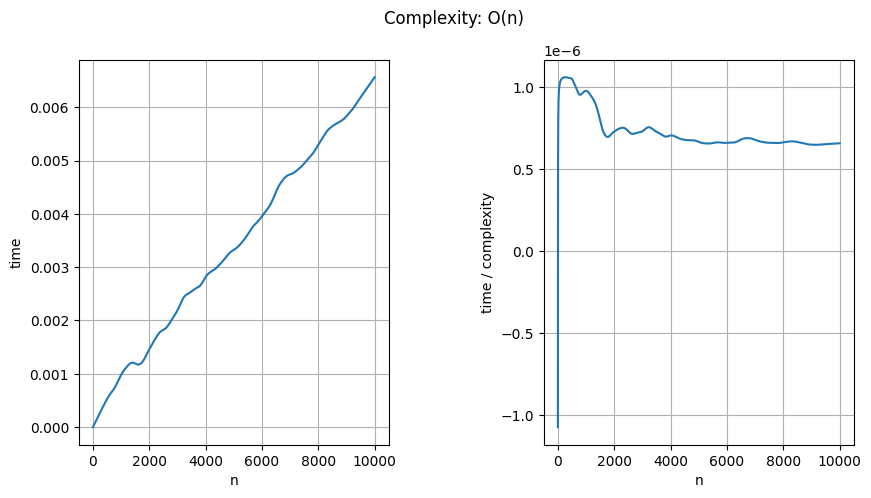

In [78]:
# Алгоритм работает за O(n)

@show_time
def calc_capacity(heights):
    return alg.calc_capacity(heights)
    
def gen_params_calc_capacity(n):
    return [np.random.randint(0, n, n)]

calc_capacity(runs_count=10000, complexity="O(n)", gen_func_args=gen_params_calc_capacity)